In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [2]:
dim_x = 0
dim_y = 1
dim_z = 2

In [6]:
f = h5py.File('.\\cstdemo\\hd5_3d\\cstdemo_dense\\E-Field (f=0.2).hdf5', 'r')
g = h5py.File('.\\cstdemo\\hd5\\cstdemo_dense\\H-Field (f=0.5) x0=1.094 y0=0.711.hdf5', 'r')

In [7]:
list(f.keys()), list(g.keys())

(['Type', 'f', 'field3d', 'x', 'y', 'z'],
 ['Type', 'f', 'x0', 'xGrad', 'y0', 'yGrad', 'z', 'zComp'])

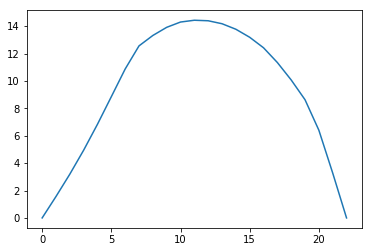

In [8]:
plt.plot(np.abs(f['field3d'][2,1,:,13]))

(115.08459516190787, 'V/m')

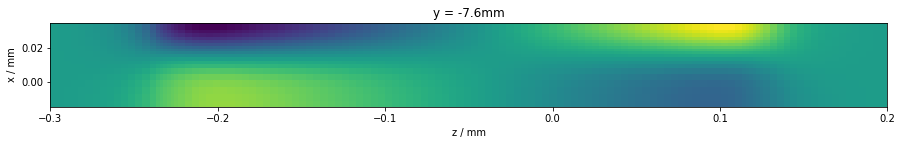

In [9]:
# y = const, x-Komponente
fig = plt.figure(figsize=[15,15])
ax = fig.gca()
ax.set_aspect('equal')

iy = 3
plt.pcolormesh(f['z'],f['x'] , np.real(np.exp(1j*123*np.pi/180)*f['field3d'][dim_x,:,iy,:]))
plt.title("y = {:.1f}mm".format(1e3*f['y'][iy]));
plt.xlabel('z / mm')
plt.ylabel('x / mm')

np.max(np.abs(f['field3d'][dim_x,:,iy,:])), 'V/m'

(34.21300892892497, 'V/m')

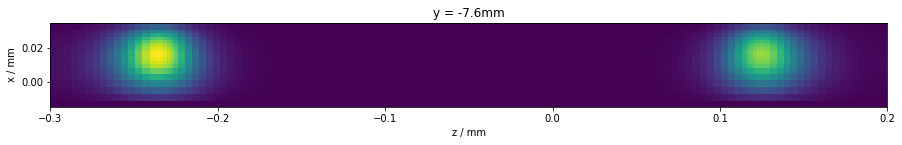

In [10]:
# y = const, z-Komponente
fig = plt.figure(figsize=[15,15])
ax = fig.gca()
ax.set_aspect('equal')

iy = 3
plt.pcolormesh(f['z'],f['x'] , np.real(np.exp(1j*123*np.pi/180)*f['field3d'][dim_z,:,iy,:]))
plt.title("y = {:.1f}mm".format(1e3*f['y'][iy]));
plt.xlabel('z / mm')
plt.ylabel('x / mm')

np.max(np.abs(f['field3d'][dim_z,:,iy,:])), 'V/m'

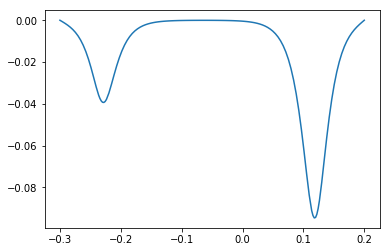

In [11]:
plt.plot(g['z'], np.imag(g['zComp']))

ValueError: Not a location (invalid object ID)

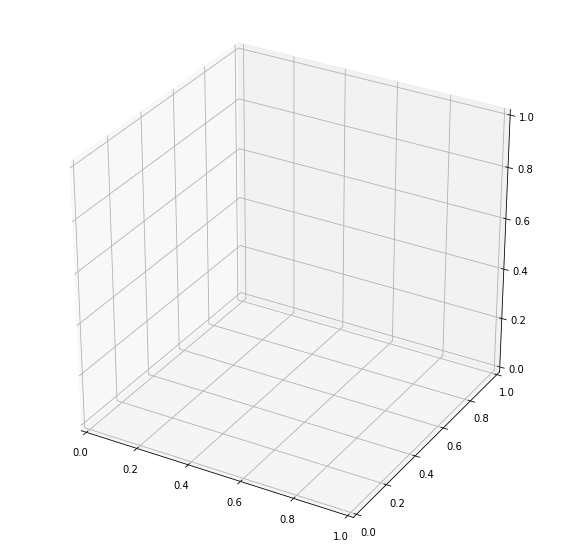

In [19]:
#FIXME
fig = plt.figure(figsize=[10,10])
ax = fig.gca(projection='3d')

# Make the grid
#x, y, z = np.meshgrid(np.arange(-0.8, 1, 0.2),
#                      np.arange(-0.8, 1, 0.2),
#                      np.arange(-0.8, 1, 0.8))

# Make the direction data for the arrows
#u = np.sin(np.pi * x) * np.cos(np.pi * y) * np.cos(np.pi * z)
#v = -np.cos(np.pi * x) * np.sin(np.pi * y) * np.cos(np.pi * z)
#w = (np.sqrt(2.0 / 3.0) * np.cos(np.pi * x) * np.cos(np.pi * y) *
#     np.sin(np.pi * z))


# Achsen
y, x, z = np.meshgrid(f['y'], f['x'], f['z'])

# Feld
u = np.real(f['field3d'][0,:,:,:])
v = np.real(f['field3d'][1,:,:,:])
w = np.real(f['field3d'][2,:,:,:])

ax.set_aspect('equal')
ax.view_init(0, 90)

ax.quiver(x, y, z , v, u, w, length=0.003, normalize=True)
plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [13]:
u.shape, x.shape

((20, 23, 125), (20, 23, 125))

In [14]:
len(f['x']), len(f['y']), len(f['z'])

(20, 23, 125)

In [15]:
#list(f['x']), list(f['y']), list(f['z'])
'x', f['x'][0], f['x'][-1], 'y', f['y'][0], f['y'][-1], 'z', f['z'][0], f['z'][-1]

('x', -0.015, 0.035, 'y', -0.02, 0.04, 'z', -0.3, 0.2)

Text(0.5, 1.0, 'z = -57.1mm')

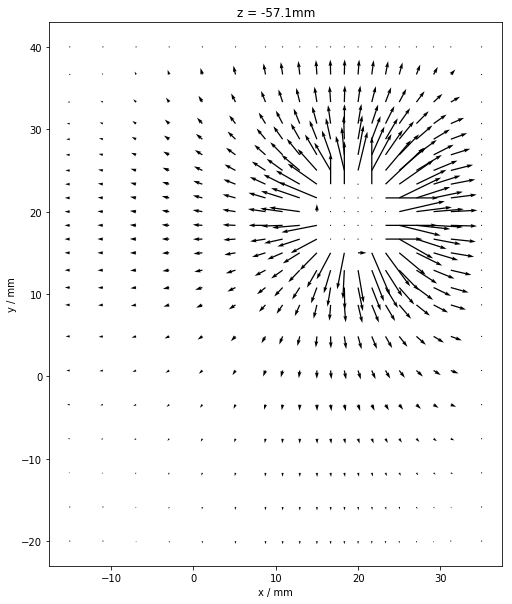

In [16]:
# z = const
fig = plt.figure(figsize=[10,10])
ax = fig.gca()

y, x = np.meshgrid(f['y'], f['x'])

iz = 60
u = np.real(f['field3d'][dim_x,:,:,iz])
v = np.real(f['field3d'][dim_y,:,:,iz])

ax.quiver(x*1e3, y*1e3, u, v)
ax.set_aspect('equal')
plt.xlabel('x / mm')
plt.ylabel('y / mm')
plt.title("z = {:.1f}mm".format(1e3*f['z'][iz]))

Text(0.5, 1.0, 'y = 10.8mm')

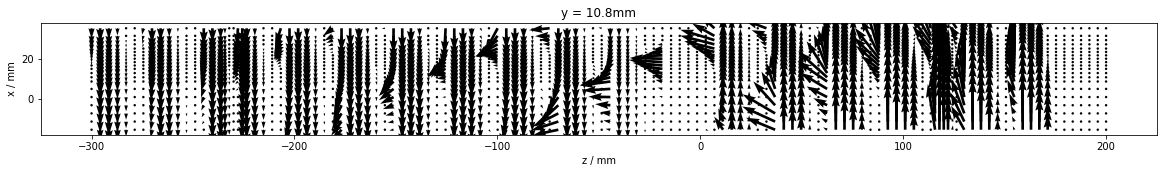

In [17]:
## FIXME
# y = const
fig = plt.figure(figsize=[20,70])
ax = fig.gca()

x, z = np.meshgrid(f['x'], f['z'])

iy = 8
u = np.real(f['field3d'][dim_x,:,iy,:])
w = np.real(f['field3d'][dim_z,:,iy,:])

ax.quiver(z*1e3, x*1e3, w, u)
ax.set_aspect('equal')
plt.ylabel('x / mm')
plt.xlabel('z / mm')
plt.title("y = {:.1f}mm".format(1e3*f['y'][iy]))

In [18]:
f.close()
g.close()